In [1]:
!module purge
!module load apps/anaconda3
!module load compilers/nvidia/cuda/11.2
!module load compilers/gcc/8.3.0

In [2]:

import cv2
import os
import random

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
import tensorflow as tf
import tensorflow.keras as keras


In [5]:
tf.__version__

'2.7.0'

In [6]:
tf.random.set_seed(42)
np.random.seed(42)


In [7]:
train_dir = "/home/191112024/splited_dataset/AGCCPF/train"
test_dir = "/home/191112024/splited_dataset/AGCCPF/test"
valid_dir = "/home/191112024/splited_dataset/AGCCPF/validate"


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
!unzip AGCCPF.zip

unzip:  cannot find or open AGCCPF.zip, AGCCPF.zip.zip or AGCCPF.zip.ZIP.


In [11]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        )

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        )

Found 5253 images belonging to 3 classes.
Found 1315 images belonging to 3 classes.
Found 1644 images belonging to 3 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
from tensorflow.keras import optimizers

In [14]:
from tensorflow.keras.applications import MobileNetV2
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))


# conv_base = EfficientNetB7(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))

# conv_base = DenseNet121(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

9420800/9406464 [==============================] - 0s 0us/step


In [15]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [16]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(3, activation='softmax'))



In [17]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/home/191112024/.local/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "modelmobilenet.h5", save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)


In [19]:
model.summary(0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
_________________________________________________________________


In [20]:
history = model.fit(train_generator,
                    steps_per_epoch=250,
                    epochs=200,
                    validation_data=valid_generator,
                    validation_steps=60,
                    callbacks=[checkpoint_cb])


Epoch 1/200
250/250 [==============================] - ETA: 0s - loss: 1.0878 - acc: 0.4448 - recall: 0.2790 - precision: 0.4713

/home/191112024/.local/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


250/250 [==============================] - 191s 734ms/step - loss: 1.0878 - acc: 0.4448 - recall: 0.2790 - precision: 0.4713 - val_loss: 1.1656 - val_acc: 0.3708 - val_recall: 0.2183 - val_precision: 0.3770
Epoch 2/200
250/250 [==============================] - 187s 745ms/step - loss: 0.9711 - acc: 0.5217 - recall: 0.3915 - precision: 0.5624 - val_loss: 1.1001 - val_acc: 0.4042 - val_recall: 0.2758 - val_precision: 0.4282
Epoch 3/200
250/250 [==============================] - 186s 743ms/step - loss: 0.9484 - acc: 0.5396 - recall: 0.4100 - precision: 0.5647 - val_loss: 1.0341 - val_acc: 0.4533 - val_recall: 0.3375 - val_precision: 0.4793
Epoch 4/200
250/250 [==============================] - 183s 730ms/step - loss: 0.9114 - acc: 0.5640 - recall: 0.4484 - precision: 0.6006 - val_loss: 0.9943 - val_acc: 0.4783 - val_recall: 0.3642 - val_precision: 0.5105
Epoch 5/200
250/250 [==============================] - 186s 742ms/step - loss: 0.8888 - acc: 0.5748 - recall: 0.4634 - precision: 0.6197

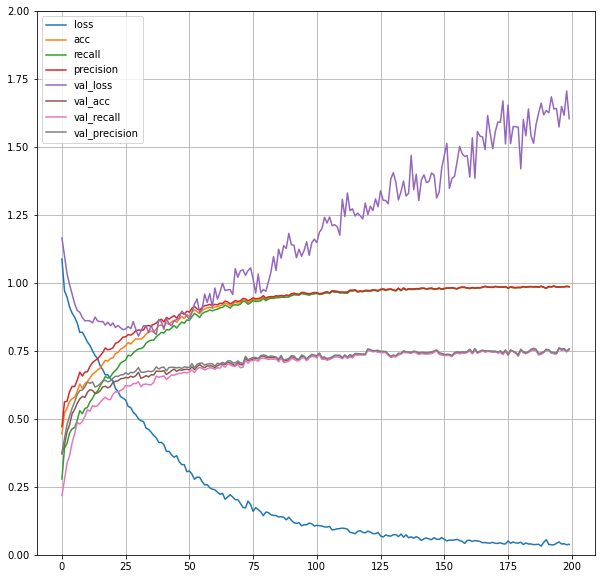

In [21]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.ylim((0,2))
plt.grid(True)
plt.show()

In [22]:
model.evaluate(test_generator)

83/83 [==============================] - 22s 265ms/step - loss: 1.5265 - acc: 0.7597 - recall: 0.7597 - precision: 0.7616


[1.5265346765518188,
 0.7597323656082153,
 0.7597323656082153,
 0.7615853548049927]

In [23]:
x=model.predict(test_generator)

In [24]:
actual=test_generator.labels
actual

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [25]:
pred=np.argmax(x, axis=-1)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 46, 156,  86],
       [106, 498, 266],
       [ 61, 294, 131]])

In [27]:
x=model.predict(train_generator)
actual=train_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 151,  482,  288],
       [ 504, 1445,  831],
       [ 266,  852,  434]])

In [28]:
x=model.predict(valid_generator)
actual=valid_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 34, 126,  71],
       [ 85, 423, 188],
       [ 49, 227, 112]])

In [29]:
x=model.predict(test_generator)
actual=test_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 32, 174,  82],
       [121, 490, 259],
       [ 60, 284, 142]])